In [41]:
import os
import glob
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [42]:
# helpers

def printLoadingScores(pca, index, component):
    # prints loading scores for a given principal component 
    loadingScores = pd.Series(pca.components_[component], index=index).sort_values(ascending=False, key=abs)
    print(loadingScores[loadingScores[0:19].index.values])
    

In [43]:
# Read and merge all cleaned data into a single data frame

df = pd.read_csv('./Data/Cleaned/AllData.csv')

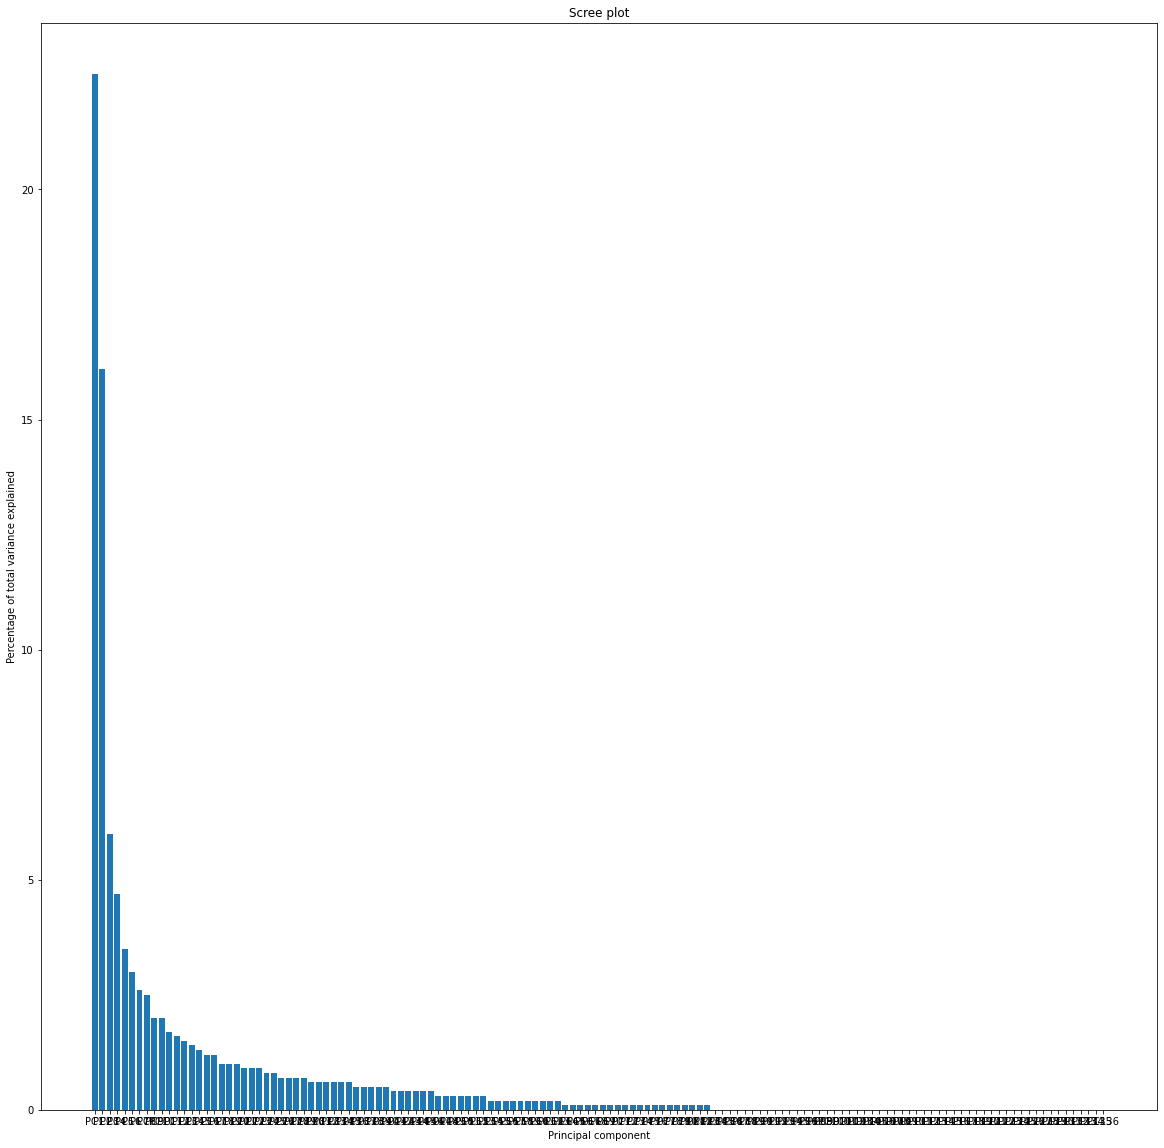

In [44]:
# drop non-numeric and unwanted coloumns
tempDf = df.drop(["Unnamed: 0", "Player", "Team"], axis=1)

# shift data mean to origin and scale variance in each feature to 1
scaledDf = preprocessing.scale(tempDf)

# perform pca
pca = PCA()
pca.fit(scaledDf)
pcaData = pca.transform(scaledDf)

# find percentage of variance accounted for by principal componenets
varPercent = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# create scree plot
labels = ['PC' + str(i) for i in range(1, len(varPercent) + 1)]

plt.figure(figsize = (20,20))
plt.bar(x=labels, height=varPercent)
plt.ylabel('Percentage of total variance explained')
plt.xlabel('Principal component')
plt.title("Scree plot")
plt.show()


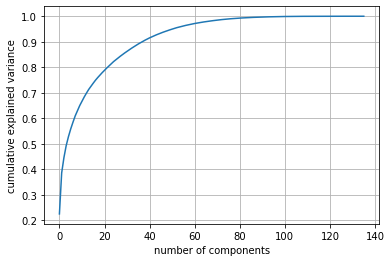

In [45]:
# get cumulative explained variance plot by number of principal components

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [60]:
print(sum(varPercent[:5]))

55.800000000000004


In [46]:
# We use 5 principal components to balance variance explaining power and interpretability of our components
# re-run pca keeping only top 5 components
pca = PCA(5)
pca.fit(scaledDf)
pcaData = pca.transform(scaledDf)

In [47]:
# re-insert players and teams to make a new data frame

pcaDf = pd.DataFrame(pcaData, columns=labels[0:5])
pcaDf = pcaDf[labels[0:5]]
pcaDf["Player"] = df["Player"]
pcaDf["Team"] = df["Team"]

pcaDf.head()

,PC1,PC2,PC3,PC4,PC5,Player,Team
0,-5.640620,10.552256,-4.593444,-2.552969,-1.725329,Stephen Curry,GSW
1,-1.727259,9.796079,-2.410997,-4.667537,0.338773,Bradley Beal,WAS
2,-6.837932,11.720170,-0.658682,-5.041650,1.170356,Damian Lillard,POR
3,14.377135,14.024165,-3.078961,4.933598,7.909128,Joel Embiid,PHI
4,8.633649,13.502873,2.200106,-0.625522,0.246974,Giannis Antetokounmpo,MIL


In [48]:
# PC1

printLoadingScores(pca, tempDf.columns, 0)
pcaDf.nlargest(10, "PC1")

PaintTouches        0.165893
PaintTouch PTS      0.165395
PaintTouch PTS      0.165395
PaintTouch FGM      0.163903
ContestedREB        0.159026
OREB%               0.156500
PaintTouch FTM      0.156001
OREB                0.154464
ContestedREB%       0.152525
ElbowTouches        0.143345
DFGA                0.139874
%DREB               0.139770
DREB%               0.139272
ElbowTouch PTS      0.139129
AVGREBDistance     -0.138265
%BLK                0.137647
ContestedDREB%      0.136660
ElbowTouch FGM      0.136435
AVG DREBDistance   -0.134515
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
94,17.523327,3.505356,2.029307,0.878754,-5.464497,Rudy Gobert,UTA
82,16.015463,2.208929,3.075044,0.369637,-2.663409,Clint Capela,ATL
65,14.850041,5.690246,-0.747189,2.741146,2.438247,Jonas Valanciunas,MEM
122,14.509915,2.011076,1.814878,0.244971,-0.474115,Jarrett Allen,CLE
3,14.377135,14.024165,-3.078961,4.933598,7.909128,Joel Embiid,PHI
86,14.283681,4.906637,4.819942,1.710130,2.841940,Andre Drummond,LAL
91,14.268472,3.943961,0.444060,2.851372,0.501990,Deandre Ayton,PHX
12,14.254428,16.171364,1.224507,8.770404,3.718649,Nikola Jokic,DEN
96,13.506047,3.738426,-1.489638,0.429368,-1.143164,Richaun Holmes,SAC
40,12.970843,11.275875,1.648937,5.706127,0.729637,Domantas Sabonis,IND


In [49]:
# PC2

printLoadingScores(pca, tempDf.columns, 1)
pcaDf.nlargest(10, "PC2")

FGM                0.199958
Front CTTouches    0.187357
FTM                0.184740
PassesMade         0.180202
AST                0.176030
USG%               0.174646
DistMiles Off      0.173949
OPPPTSPAINT        0.173027
DistMiles Def      0.167465
DriveFGM           0.166052
PIE                0.166000
SecondaryAST       0.164789
OPPPTSOFFTOV       0.164749
Pull UpFGM         0.162861
Pull UpPTS         0.161316
DriveFTM           0.160778
Drives             0.159938
AST%               0.146555
POSS               0.145743
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
12,14.254428,16.171364,1.224507,8.770404,3.718649,Nikola Jokic,DEN
5,-3.724681,14.071122,3.274677,-4.566814,2.725041,Luka Doncic,DAL
3,14.377135,14.024165,-3.078961,4.933598,7.909128,Joel Embiid,PHI
4,8.633649,13.502873,2.200106,-0.625522,0.246974,Giannis Antetokounmpo,MIL
29,-3.132501,13.180674,6.616577,-0.192019,0.065559,Russell Westbrook,WAS
20,-5.764991,13.014096,5.689941,-1.813368,1.692777,James Harden,BKN
17,0.648631,12.145889,-0.570205,1.869983,2.219227,Kawhi Leonard,LAC
22,2.335756,11.882444,-0.537096,3.393245,1.244529,Julius Randle,NYK
2,-6.837932,11.720170,-0.658682,-5.041650,1.170356,Damian Lillard,POR
14,-9.307142,11.669936,4.457189,-4.507507,-1.442589,Trae Young,ATL


In [50]:
# PC3

printLoadingScores(pca, tempDf.columns, 2)
pcaDf.nlargest(10, "PC3")

C&SFGM             -0.251752
C&S3PM             -0.248098
PTSPerTouch        -0.224025
AST Ratio           0.209855
3PM                -0.190929
FGM%UAST            0.176504
FGM%AST            -0.176490
3P%                -0.174931
%FGA2PT             0.168260
%FGA3PT            -0.168260
PaintTouch PTS%    -0.165652
PTSPerPaintTouch   -0.165652
TO Ratio            0.163863
AST%                0.160938
C&S3P%             -0.150498
3FGM%AST           -0.150255
PaintTouch PASS%    0.146859
AvgSecPerTouch      0.137035
ElbowTouch PTS%    -0.135150
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
396,4.453233,-5.665317,8.350513,-0.285138,0.138891,Ed Davis,MIN
393,-5.849813,-3.579253,7.676978,2.492213,3.507841,Matthew Dellavedova,CLE
247,-7.759431,0.366958,7.274913,1.606835,5.661476,Mike James,BKN
218,-6.313495,3.134325,6.871235,2.015915,-3.960203,T.J. McConnell,IND
29,-3.132501,13.180674,6.616577,-0.192019,0.065559,Russell Westbrook,WAS
321,-10.636557,-2.341140,6.341616,3.760230,3.447052,Yogi Ferrell,LAC
333,-6.183319,-0.361203,6.114228,2.771732,0.847384,Rajon Rondo,LAC
272,0.919129,4.110845,6.039257,6.249054,-3.378267,Draymond Green,GSW
256,-7.817056,-1.456685,6.008166,2.577148,4.392204,Malachi Flynn,TOR
382,-8.210831,-3.926858,5.965872,1.414110,2.108128,Nico Mannion,GSW


In [51]:
# PC4

printLoadingScores(pca, tempDf.columns, 3)
pcaDf.nlargest(10, "PC4")

ElbowTouch PASS%     0.212825
PTSPerElbow Touch   -0.177382
ElbowTouch PTS%     -0.177382
NETRTG               0.167272
ElbowTouch PF%      -0.167206
+/-                  0.160747
%PTSFT              -0.157647
AGE                  0.156460
DEFWS                0.147879
PostTouchAST         0.145572
C&SFGM               0.143340
DEF RTG             -0.139868
DEFRTG              -0.139868
PTSPerPaintTouch    -0.138855
PaintTouch PTS%     -0.138855
DriveFTM            -0.137427
ElbowTouch AST       0.137343
PaintTouch PASS%     0.133861
DriveFGM            -0.133738
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
12,14.254428,16.171364,1.224507,8.770404,3.718649,Nikola Jokic,DEN
25,8.614540,9.652256,-3.502210,7.750057,6.233290,Nikola Vucevic,CHI
276,-2.088815,-0.915848,-0.409045,6.453300,-4.336041,Royce O'Neale,UTA
272,0.919129,4.110845,6.039257,6.249054,-3.378267,Draymond Green,GSW
351,2.398618,-2.807776,1.484306,6.237292,-1.231273,Marc Gasol,LAL
234,-1.047867,-1.925872,-1.492843,6.088311,-2.097409,Nicolas Batum,LAC
138,-7.633142,2.849849,0.774069,5.833336,-2.442878,Joe Ingles,UTA
195,3.952173,1.538145,1.902272,5.826040,-1.556959,Larry Nance Jr.,CLE
40,12.970843,11.275875,1.648937,5.706127,0.729637,Domantas Sabonis,IND
178,-1.693163,-1.319939,-2.809990,5.266819,-1.014830,Jae Crowder,PHX


In [52]:
# PC5

printLoadingScores(pca, tempDf.columns, 4)
pcaDf.nlargest(10, "PC5")

ElbowTouch FG%         -0.238944
ElbowTouch FG%         -0.238944
DEFWS                  -0.180186
%PTS2PT MR              0.175586
PostTouch PTS           0.171378
STL                    -0.170286
PostTouchFGM            0.167547
PaintTouch FG%         -0.163527
PaintTouch FG%         -0.163527
PostTouchFTM            0.161895
PostUps                 0.158854
AdjustedDREB Chance%    0.157846
REBChance%              0.154461
DistMiles Def          -0.145245
ElbowTouch PTS%        -0.145035
PTSPerElbow Touch      -0.145035
%PTSOffTO              -0.140981
NETRTG                 -0.138742
POSS                   -0.136819
dtype: float64


,PC1,PC2,PC3,PC4,PC5,Player,Team
3,14.377135,14.024165,-3.078961,4.933598,7.909128,Joel Embiid,PHI
112,-0.117350,1.610050,-3.072360,0.180673,6.916184,Carmelo Anthony,POR
25,8.614540,9.652256,-3.502210,7.750057,6.233290,Nikola Vucevic,CHI
106,4.770217,1.723987,-3.576856,2.690418,5.981984,LaMarcus Aldridge,BKN
241,-5.733622,-2.994692,0.893533,1.976273,5.837531,Anfernee Simons,POR
260,-5.844053,-4.085095,1.997704,2.401857,5.819840,Jalen Harris,TOR
247,-7.759431,0.366958,7.274913,1.606835,5.661476,Mike James,BKN
370,-3.386457,-4.452257,3.187573,-0.120949,5.185867,Rodney Hood,TOR
385,-5.779668,-4.674491,4.665776,0.503725,5.051316,Jordan Bone,ORL
42,8.506530,4.781223,-4.557805,2.906598,4.656307,Kristaps Porzingis,DAL


In [53]:
pcaDf.to_csv('./Data/PCAData.csv', index = False)

In [54]:
""" Can consider using this cell if we get nice clusters based on just a few variables.

# Principal component plot

pcaDf = pd.DataFrame(pcaData, columns=labels)

# plt.scatter(pcaDf.PC1, pcaDf.PC2, pcaDf.PC3)
# plt.show()

# Fixing random state for reproducibility

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

xs = pcaDf.PC1
ys = pcaDf.PC2
zs = pcaDf.PC3
ax.scatter(xs, ys, zs, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
"""

" Can consider using this cell if we get nice clusters based on just a few variables.\n\n# Principal component plot\n\npcaDf = pd.DataFrame(pcaData, columns=labels)\n\n# plt.scatter(pcaDf.PC1, pcaDf.PC2, pcaDf.PC3)\n# plt.show()\n\n# Fixing random state for reproducibility\n\nfig = plt.figure()\nax = fig.add_subplot(projection='3d')\n\nn = 100\n\n# For each set of style and range settings, plot n random points in the box\n# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].\n\nxs = pcaDf.PC1\nys = pcaDf.PC2\nzs = pcaDf.PC3\nax.scatter(xs, ys, zs, marker='o')\n\nax.set_xlabel('X Label')\nax.set_ylabel('Y Label')\nax.set_zlabel('Z Label')\n\nplt.show()\n"